# Example for Testing Stem-PNC and Estimating PNC Distribution

This document describes how to test Stem-PNC, a method for estimating particle number concentration (PNC) distribution, using a small dataset. The following steps guide the user through data preparation, model loading, prediction, and visualization of the PNC distribution.

### 1. Data Preparation

- **Feature Data**: The feature data used in this example has already been cleaned and merged, containing meteorological and air quality features. The dataset `feature_Data` includes data from only one station: `BAS` (Basel).
  
- **Data Dimensions**:
    - **Training Data**: The training dataset has the shape `(20200, 13)`, with 13 features.
    - **Test Data**: The test dataset has the shape `(2020, 13)`, also with 13 features.

### 2. Model Loading

The trained model for Stem-PNC is available online and can be downloaded from Hugging Face:
[Stem-PNC Trained Model](https://huggingface.co/jyyd23/PNC_Estimate/blob/main/stack_trainedModel.joblib). And the local model is also supported.

```python
from joblib import load

# Load the pre-trained model from local
model_path = '/out/pnc_model/stack_trainedModel.joblib'
stacked_model = load(model_path)
```

### 3. Local Execution Instructions

This example can be fully executed on a personal laptap. All the dependencies used in the script are available in standard Python packages. Below are the necessary libraries and installation instructions:

#### Required Python Libraries:
1. **numpy**: for numerical operations
2. **pandas**: for data handling and processing
3. **scikit-learn**: for model loading and evaluation
4. **matplotlib**: for plotting and visualization
5. **xarray**: for handling multi-dimensional data
6. **scipy**: for interpolation and mathematical functions
7. **geopandas**: for geographic operations and shapefile loading
8. **joblib**: for loading the pre-trained model
9. **tqdm**: for progress bars

#### Installing the dependencies:
Run the following command to install the necessary Python libraries:

```bash
pip install numpy pandas scikit-learn matplotlib xarray scipy geopandas joblib tqdm
```

### 4. Testing and Estimation Phases

This example performs both stacking and estimating phases locally on the provided dataset. Below is an overview of the steps:

1. **Load the Dataset**:
    - The `./example_test/dataset/` file need to download from: [dataset](https://huggingface.co/jyyd23/PNC_Estimate/blob/main/dataset).
    - The preprocessed dataset containing feature data for the BAS station is loaded using `pandas`:
    
    ```python
    import pandas as pd
    import data_fuction as data_fuction

    feature_data_2016_2019 = pd.read_csv('./dataset/feature_Data/feature_2016_2019.csv') # Total 20200 rows data
    feature_data_2020 = pd.read_csv('./dataset/feature_Data/feature_2020.csv') # Total 2020 rows data
    # recheck the columns and sort
    feature_data_2016_2019  = feature_data_2016_2019 [['Date/time', 'station', 'CPC [1/cm3]', 'NOX [ug/m3 eq. NO2]',
                                                    'PM10 [ug/m3]', 'PM2.5/PM10 ratio', 'O3 [ug/m3]',
                                                    'Radiation[W/m2]', 'Temperature', 'Precipitation[mm]',
                                                    'Relative humidity[%]', 'Wind speed[m/s]', 'trafficVol', 'hour', 'month', 'weekday']]
    feature_data_2020 = feature_data_2020[['Date/time', 'station', 'CPC [1/cm3]', 'NOX [ug/m3 eq. NO2]',
                                        'PM10 [ug/m3]', 'PM2.5/PM10 ratio', 'O3 [ug/m3]',
                                        'Radiation[W/m2]', 'Temperature', 'Precipitation[mm]',
                                        'Relative humidity[%]', 'Wind speed[m/s]', 'trafficVol', 'hour', 'month', 'weekday']]
    # get the standerlized data
    x_train, y_train, x_test, y_test, pnc_scaler = data_fuction.get_train_test_data(feature_data_2016_2019, feature_data_2020)
    ```

2. **Load the Pre-Trained Model and Prediction**:
    - Load the pre-trained Stem-PNC model, as mentioned above.

    ```python
    # get the model results in solo model
    linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg = data_fuction.get_model_reg(x_train, y_train, 2)

    # get the model results for solo model in csv and print the results
    data_fuction.save_model_results(linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg,
                                    x_test, y_test, feature_data_2020)

    # get the model results in ensemble model
    print('----------------------------------------')
    print("Stacking model")
    stack_model = data_fuction.get_stacking_results(linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg,
                                                    x_train, y_train, x_test, y_test, feature_data_2020)
    ```

3. **Estimatino**:
    - Use the local trained model to make estimation on the test data.
    ```python
        # get the estimation results
        data_fuction.get_results_all(pnc_scaler)
    ```

4. **Visualization**:
    - After obtaining the predictions, visualize the estimated PNC distribution on a map using `matplotlib` and `geopandas`. The script included above creates a contour map of the PNC predictions over Switzerland.

### 5. Code Execution

All the scripts provided, including data processing, model loading, and visualization, can be run on any personal computer equipped with Python 3.x. No specific hardware, such as GPUs, is required to execute the examples. Ensure that the system has sufficient memory to handle the dataset sizes, but given the small dataset in this example, most modern personal computers should be sufficient.

### 6. Running the Code

Here’s how to run the code:

1. **Download the model**:
    - Download the pre-trained model from Hugging Face and save it in your project directory or just used the local one.
  
2. **Set up the Python environment**:
    - Install the necessary libraries using the provided `pip` command.
  
3. **Run the Python script**:
    - You can run the script by executing it in a Python environment (e.g., Jupyter Notebook, PyCharm, or directly 

In [1]:
import pandas as pd
import data_fuction as data_fuction

feature_data_2016_2019 = pd.read_csv('./dataset/feature_Data/feature_2016_2019.csv') # Total 20200 rows data
feature_data_2020 = pd.read_csv('./dataset/feature_Data/feature_2020.csv') # Total 2020 rows data
# recheck the columns and sort
feature_data_2016_2019  = feature_data_2016_2019 [['Date/time', 'station', 'CPC [1/cm3]', 'NOX [ug/m3 eq. NO2]',
                                                   'PM10 [ug/m3]', 'PM2.5/PM10 ratio', 'O3 [ug/m3]',
                                                   'Radiation[W/m2]', 'Temperature', 'Precipitation[mm]',
                                                   'Relative humidity[%]', 'Wind speed[m/s]', 'trafficVol', 'hour', 'month', 'weekday']]
feature_data_2020 = feature_data_2020[['Date/time', 'station', 'CPC [1/cm3]', 'NOX [ug/m3 eq. NO2]',
                                       'PM10 [ug/m3]', 'PM2.5/PM10 ratio', 'O3 [ug/m3]',
                                       'Radiation[W/m2]', 'Temperature', 'Precipitation[mm]',
                                       'Relative humidity[%]', 'Wind speed[m/s]', 'trafficVol', 'hour', 'month', 'weekday']]
# get the standerlized data
x_train, y_train, x_test, y_test, pnc_scaler = data_fuction.get_train_test_data(feature_data_2016_2019, feature_data_2020)

# get the model results in solo model
linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg = data_fuction.get_model_reg(x_train, y_train, 2)

# get the model results for solo model in csv and print the results
data_fuction.save_model_results(linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg,
                                x_test, y_test, feature_data_2020)

# get the model results in ensemble model
print('----------------------------------------')
print("Stacking model")
stack_model = data_fuction.get_stacking_results(linear_reg, lasso_reg, svm_reg, knn_reg, tree_reg, rf_reg, ada_reg, gbr_reg, lgb_reg,
                                                x_train, y_train, x_test, y_test, feature_data_2020)

The train dataset ratio =  0.9090909090909091
The test dataset ratio =  0.09090909090909091
(22220, 13) 20200 2020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1988
[LightGBM] [Info] Number of data points in the train set: 20200, number of used features: 12
[LightGBM] [Info] Start training from score 8624.465202
----------------------------------
MSE:  10437164.078045387
MAE:  2433.26440659476
r2 score:  0.6570594669164793
Explained_variance:  0.6574710228214111
----------------------------------
MSE:  11028859.353800777
MAE:  2532.3018563015494
r2 score:  0.6376177592099397
Explained_variance:  0.6394513828043488
----------------------------------
MSE:  15740273.995433124
MAE:  2943.1746831153455
r2 score:  0.4828118141565696
Explained_variance:  0.5060388465030399
-------------

In [2]:
# get the estimation results
data_fuction.get_results_all(pnc_scaler)

  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [01:16<00:00,  3.17s/it]


(211, 531) (211,) (531,)


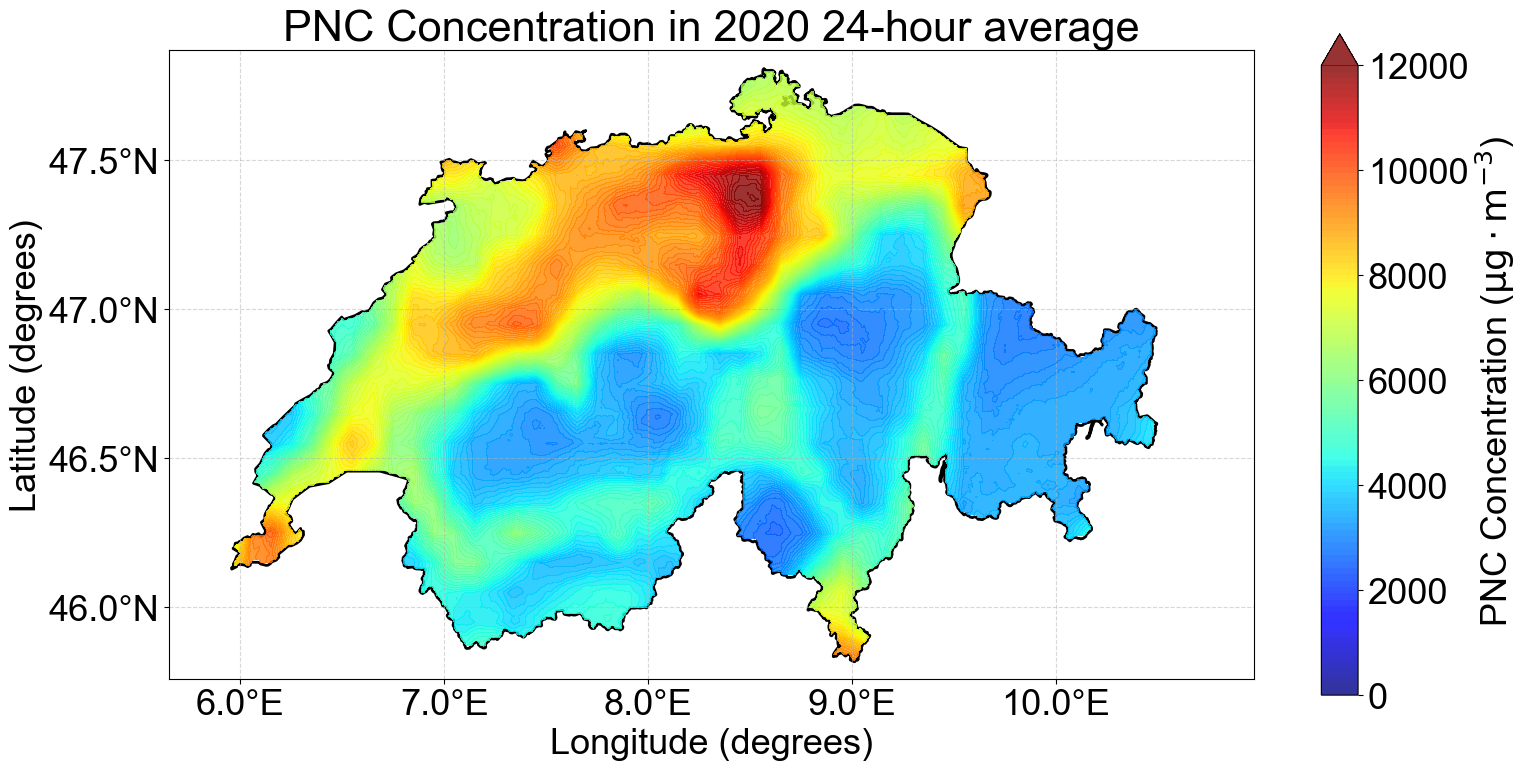

In [3]:
# plot the results
import numpy as np
import xarray as xr
import scipy.io as sio
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
from matplotlib.path import Path
import matplotlib.colors as colors
import matplotlib
import warnings

warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 26

def in_shp(mat_lon, mat_lat, input_data):
    # Load Switzerland shapefile
    switzerland = gpd.read_file('../../../pncEstimator-main/data/geoshp/gadm36_CHE_0.shp')
    switzerland_polygon = switzerland.unary_union
    paths = []
    if switzerland_polygon.geom_type == 'MultiPolygon':
        for polygon in switzerland_polygon.geoms:
            paths.append(Path(np.array(polygon.exterior.coords)))
    else:
        paths.append(Path(np.array(switzerland_polygon.exterior.coords)))

    lon_grid, lat_grid = np.meshgrid(mat_lon, mat_lat)
    lon_lat_points = np.vstack((lon_grid.flatten(), lat_grid.flatten())).T
    inside_swiss_mask = np.zeros(len(lon_lat_points), dtype=bool)
    for path in paths:
        inside_swiss_mask |= path.contains_points(lon_lat_points)
    inside_swiss_mask = inside_swiss_mask.reshape(input_data.shape)
    inside_swiss_data = np.where(inside_swiss_mask, input_data, 0)
    return inside_swiss_data, switzerland, lon_grid, lat_grid

mat_data = sio.loadmat('./dataset/allbin/PNC2020_mat/2020_PNC_avgConc_stack.mat')
mat_lat = mat_data['latNew'].flatten().tolist()
mat_lon = mat_data['lonNew'].flatten().tolist()
mat_lat.append(mat_lat[-1] + 0.01)
mat_lon.append(mat_lon[-1] + 0.01)
pnc_mat = mat_data['avgConc']
mat_lon = np.array(mat_lon)
mat_lat = np.array(mat_lat)
pnc_mat = np.array(pnc_mat)
print(pnc_mat.shape, mat_lat.shape, mat_lon.shape)

fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
in_pnc, switzerland, lon_grid, lat_grid = in_shp(mat_lon, mat_lat, pnc_mat)
 
switzerland.plot(ax=ax, color='none', edgecolor='k', linewidth=2)
masked_data = np.ma.masked_where(in_pnc < 0.1, in_pnc)  # Apply the in_shp mask
cp = ax.contourf(lon_grid, lat_grid, masked_data, cmap='jet', alpha=0.8,
                 extend='max', levels=np.linspace(0.1, 12000, 100),
                 vmin=0.1, vmax=12000)
cbar = plt.colorbar(cp, ax=ax, extend='max', aspect=18)
cbar.set_label(f'PNC Concentration ($\mathrm{{μg \cdot m^{{-3}}}}$)')
cbar.locator = ticker.MaxNLocator(6)
cbar.update_ticks()

ax.set_xlim([mat_lon.min(), mat_lon.max()+0.02])
ax.set_ylim([mat_lat.min(), mat_lat.max()+0.02])
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')
ax.grid(True, linestyle='--', alpha=0.5)

x_ticks = ax.get_xticks()
new_x_ticks = [f'{x:.1f}°E' for x in x_ticks]
ax.set_xticklabels(new_x_ticks)
y_ticks = ax.get_yticks()
new_y_ticks = [f'{y:.1f}°N' for y in y_ticks]
ax.set_yticklabels(new_y_ticks)

plt.tight_layout()
plt.title('PNC Concentration in 2020 24-hour average')
plt.show()